In [ ]:
#Imports
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
#Mount the drive.
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
image_dir = '/content/drive/MyDrive/datasetD'

# 1.	Load all the images into appropriate data structure (numpy array). Check the number of dimensions of this numpy array variable

In [ ]:
image_list = []
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = Image.open(os.path.join(image_dir, filename))
        image_list.append(np.array(img))

# Convert the list of images to a numpy array
image_array = np.array(image_list)

# Check the dimensions of the numpy array
print("Dimensions of the NumPy array:", image_array.shape)


Dimensions of the NumPy array: (5,)


<ipython-input-31-d83fbf5075d4>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image_array = np.array(image_list)


# 2. 	Resize all images to 100*100.

In [ ]:
# Resize all images to 100x100
resized_images = []
for img in image_array:
    resized_img = Image.fromarray(img).resize((100, 100))
    resized_images.append(np.array(resized_img))

# Convert the resized images list to a numpy array
resized_array = np.array(resized_images)


#3.	Display the resultant images.

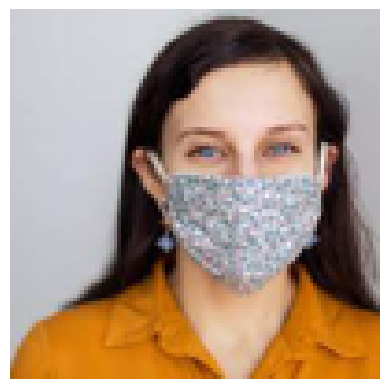

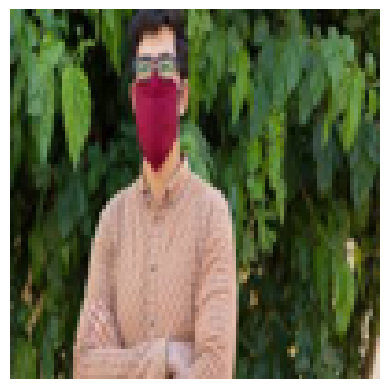

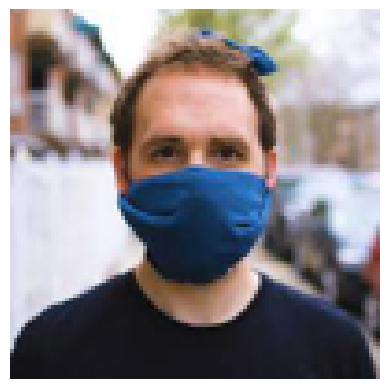

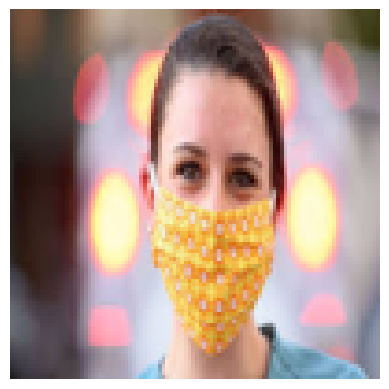

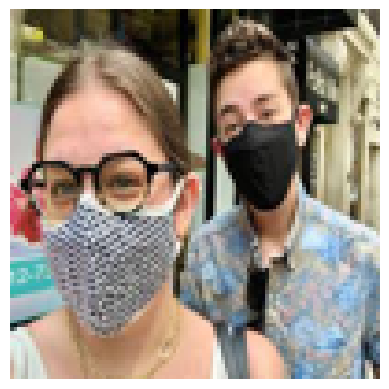

In [ ]:
# Display the resultant images
import matplotlib.pyplot as plt

for img in resized_array:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

#4.	Draw image color histogram for each of these images.

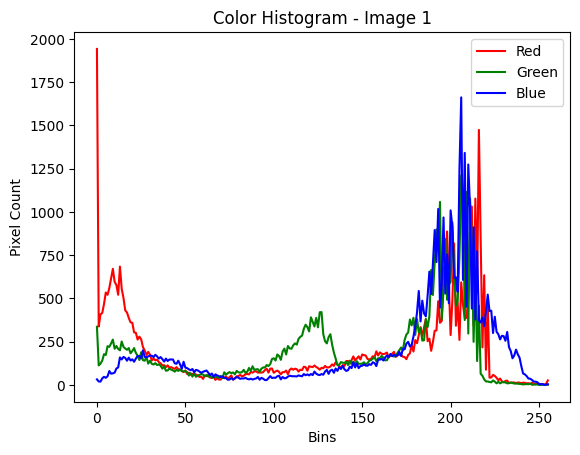

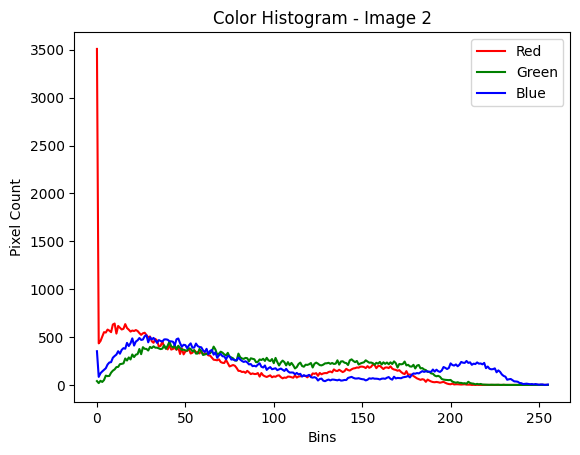

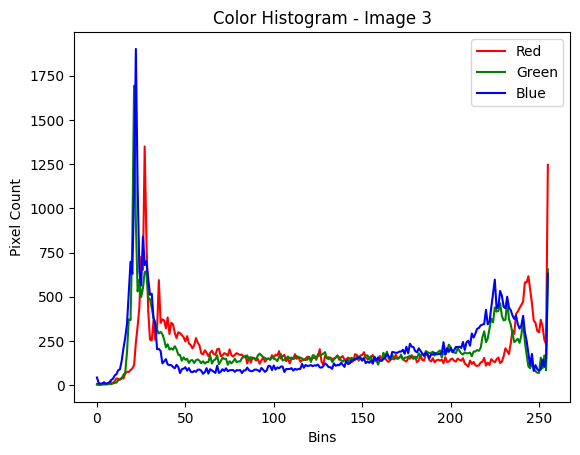

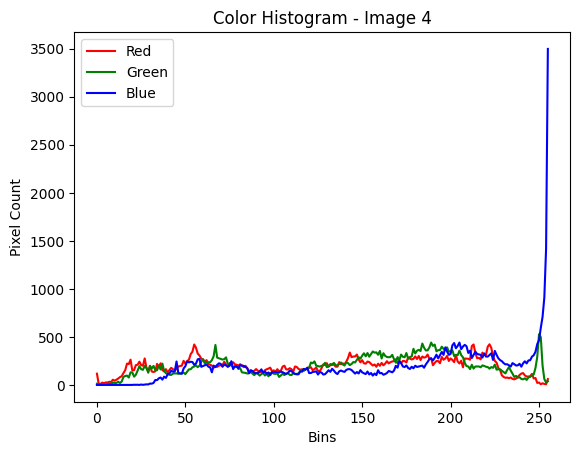

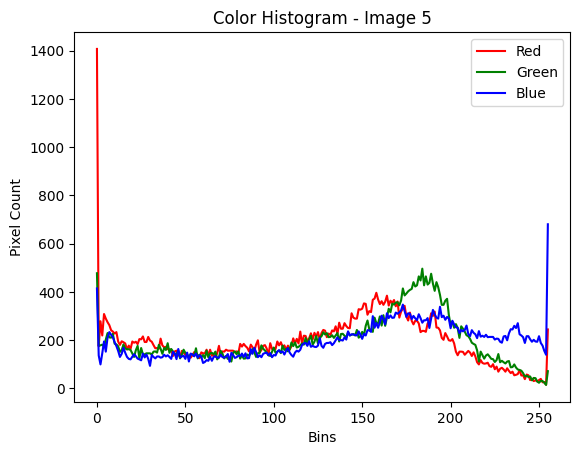

In [ ]:
for i in range(len(image_array)):
    # Convert the image to RGB color space
    rgb_image = cv2.cvtColor(image_array[i], cv2.COLOR_BGR2RGB)

    # Calculate the histogram for each channel (R, G, B)
    hist_r = cv2.calcHist([rgb_image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([rgb_image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([rgb_image], [2], None, [256], [0, 256])

    # Plot the histograms
    plt.figure()
    plt.title("Color Histogram - Image {}".format(i+1))
    plt.xlabel("Bins")
    plt.ylabel("Pixel Count")
    plt.plot(hist_r, color='red', label='Red')
    plt.plot(hist_g, color='green', label='Green')
    plt.plot(hist_b, color='blue', label='Blue')
    plt.legend()
    plt.show()

Observation from the obtained histogram are as follows:


1.   This image is of dark tone image. Frequency of red colour is dominant. It is a unbalanced colour image as relative height of RGB varies largely. It is a saturated image as frequency of peaks can seen towards the higher end of the graph.
2. It is a light tone image as RGB peaks is at the lower end of the graph. Red colour is dominant asit has relatively higher peak height. It is a very low contrast, desaturated or pastel coloured image
3.  It is a light tone image as RGB peaks is at the lower end of the graph. Blue colour is dominant as it has relatively higher peak height It is a low contrast, saturated image  
4.It is a dark tone image as RGB peaks is at the higher end of the graph. Blue colour is dominant as it has relatively higher peak height. It is a high contrast, saturated image
5. It is a lighter tone image as RGB peaks is at the lower end of the graph. Red colour is dominant as it has relatively higher peak height. It is a high contrast, saturated image

